In [ ]:
This IPython Notebook shows an example on how to easliy analyze data produced by ZEN's image analysis.

1. 26 out of of 96 wells with 1 position per well were used for acquistion
2. 2 CSV tables were created
  * one containing the info for all objects per well
  * one containing all single objects --> this is the one that contains all the information
 
Finally the two tables were saved to hard disk. This whole procedure can be completely automated via OAD, if required.
 
**It is also possible to start the analysis steps below from within an OAD macro.**

Remark: This notebook illustrates the possibilities to play around with those test images and data.

<img src="Data\Zen_Wellplate_Experiment_26Wells_1Pos.png" />

The image above shows the actual setup of the test experiment used to create the data. The resulting image is analyzed in ZEN using a built-in image analyis. The cricial step during the setup of the analysis is to select the correct features that are important to be able to correctly assign the data later on when using the pandas library.

<img src="Data\Zen_Wellplate_Experiment_IAS1.png" />
<img src="Data\Zen_Wellplate_Experiment_IAS2.png" />

The result of such an image analyis is shown below. The resulting table can be saves as a CSV table and the imported into Python using the Pandas library.

<img src="Data\Zen_Wellplate_Experiment_IAS3.png" />

Now we are ready to start using the Python.

**To simplify te required function are placed inside a separate model called wellplate_tools_pandas. This will not explained here in detail.**

In [1]:
# do the required imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(r'Modules')
import wellplate_tools_pandas as wpp
%matplotlib inline

# define the filenames
filename_single = 'Data\96Well_Ch=1_26Wells_1P_Well_SingleRegions.csv'

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# define wellplate type --> here a 96 wellplate was used
Nr = 8
Nc = 12

# define number of measured parameters beside the actual object number
num_measured_parameters = 4

# THIS PARAMETER LIST DEPENDS ON THE ACTUAL IAS IN ZEN AND MUST BE ADAPTED
parameter_list = ['DAPI_Mean', 'Area', 'Perimeter', 'Roundness']

# read the CSV table containing all the single object data for further "in-depth" analysis
df_single = pd.read_csv(filename_single, sep=';')

# rename columns and correct data types
df_single = wpp.rename_col_fromcsv_single(df_single, parameter_list)

# show part of dataframe
df_single[:3]

,WellID,RowID,ColumnID,ID,Index,DAPI_Mean,Area,Perimeter,Roundness
1,A1,1,1,2,1,88.544643,369.359872,72.898118,0.685591
2,A1,1,1,3,2,89.075472,524.359104,88.930542,0.562352
3,A1,1,1,4,3,127.159184,807.974720,108.412448,0.612860


In [3]:
# use statistics --> to keep the example simple we calculate the mean values for a wells to be displayed inside the heatmaps.
# currently implemented are mean, median, min, max. But this can be easily extended. 
stf = 'mean'

# create a dictionary containing a dataframe for every measure parameters as a heatmap
# and a dictionary containg the mean values for all wells containg actual data points.
# --> this function contains all the "magic" ...
heatmap_dict, well_dict = wpp.fill_heatmaps(df_single, num_measured_parameters, Nr, Nc, statfunc=stf, verbose=False)

In [4]:
# example for entry for well C3
well_dict['C3']

RowID             3.000000
ColumnID          3.000000
ID               86.500000
Index            85.500000
DAPI_Mean        63.336430
Area            531.536791
Perimeter        89.382251
Roundness         0.592467
ObjectNumber    170.000000
dtype: float64

This is brief description about the steps executed inside the **fill_heatmaps** function. It creates a dictionary containing heatmaps (dataframes) for all measured parameters.
    
1. Determine how many wells actually contain data
2. Loop over all wells
3. Extract only data fro current well from dataframe and calc statistics
4. Save the results in a dictionary containing entries for all wells
5. Fill the arrays with the values for the measured parameters from the well dictionary
6. Create a dictionary that contains heatmaps (dataframes) for all measured parameters

Input Parameters:

* input data frame
* number of measured parameters except the object number
* number of rows of well plate --> 96 plate = 8
* number of rows of well plate --> 96 plate = 12
* choice which statistics should be calculated

Output Parameters:

* dictionary containing one dataframe for all measured parameters plus one entry the object numbers
* dictionary containing entries for every well analyzed with the values calculated by the statistical function

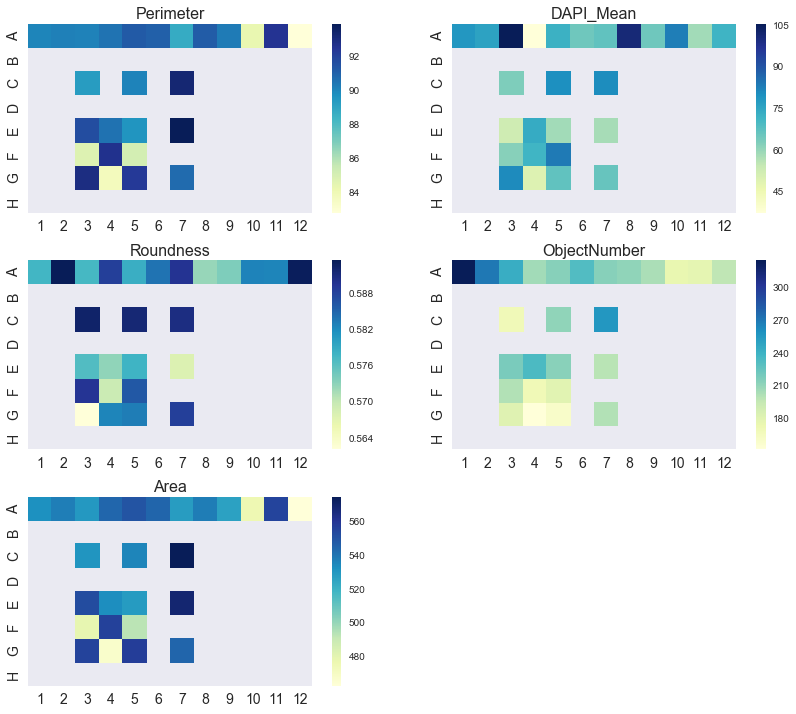

In [5]:
# create figure with subplots
fig, axn = plt.subplots(3, 2, figsize=(12, 10))
# counter for the graphs to plot while iterating over all measured params
plotid = -1

# test heatmaps
for key in heatmap_dict.iterkeys():

    plotid = plotid + 1
    # get the desired heatmap from the dictionary containing all heatmaps
    heatmap_test = heatmap_dict[key]
    # create the actual heatmap
    ax = sns.heatmap(heatmap_test, ax=axn.flat[plotid], cmap="YlGnBu", linecolor='black', square=True)

    # customize the plot to your needs
    ax.set_title(key, fontsize=16)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)

# delete subplot number 6 because it is not needed here
fig.delaxes(axn.flat[5])
# modify the layout so the the axis labels and titles do not overlap
plt.tight_layout()
# show plots
plt.show()

In [6]:
# show all key = measure parameters for that dictionary
heatmap_dict.keys()

['Perimeter', 'DAPI_Mean', 'Roundness', 'ObjectNumber', 'Area']

In [7]:
# show example entry of the dictionary for a parameter
heatmap_dict['ObjectNumber']

,1,2,3,4,5,6,7,8,9,10,11,12
A,326,271,244,207,215,233,215,212,204,176,179,198
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,170,NaN,212,NaN,257,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,219,235,214,NaN,200,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,202,171,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,182,152,161,NaN,202,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
